<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

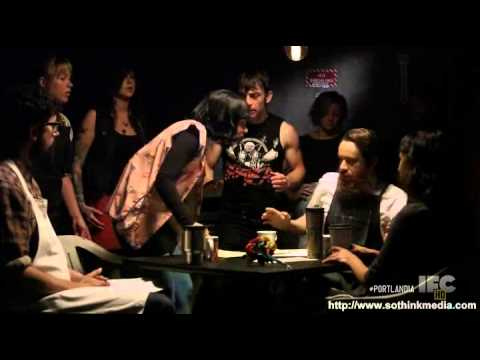

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/iesous-kurios/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import seaborn as sns
import re

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [6]:
X = shops.copy()

In [7]:
X['star_rating'] = X['star_rating'].map(lambda x: x.rstrip('star rating'))

In [8]:
X.star_rating.value_counts()

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

In [9]:
X['full_review_text'] = X['full_review_text'].apply(lambda x: x.lower())

In [10]:
X.full_review_text.head()

0     11/25/2016 1 check-in love love loved the atm...
1     12/2/2016 listed in date night: austin, ambia...
2     11/30/2016 1 check-in listed in brunch spots ...
3     11/25/2016 very cool decor! good drinks nice ...
4     12/3/2016 1 check-in they are located within ...
Name: full_review_text, dtype: object

In [11]:
X['date'] = X['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")

In [12]:
X.date

0       11/25/2016
1        12/2/2016
2       11/30/2016
3       11/25/2016
4        12/3/2016
           ...    
7611     2/19/2015
7612     1/21/2016
7613     4/30/2015
7614      8/2/2015
7615     5/23/2015
Name: date, Length: 7616, dtype: object

In [13]:
def remove_dates(sentence):
    """remove the dates like Mar 30  2013"""
    sentence = re.sub('(0|1|2|3|4|5|6|7|8|9|10|11|12|/|check-in)', '', sentence)
    return sentence

In [14]:
X['full_review_text'].apply(remove_dates)

0           love love loved the atmosphere! every corn...
1         listed in date night: austin, ambiance in au...
2           listed in brunch spots i loved the eclecti...
3         very cool decor! good drinks nice seating  h...
4           they are located within the northcross mal...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok, the steeping room is awesome. how do the...
7613      loved coming here for tea, and the atmospher...
7614      the food is just average. the booths didn't ...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text, Length: 7616, dtype: object

In [15]:
X['full_review_text'] = X['full_review_text'].apply(remove_dates)

In [16]:
X['full_review_text'].head()

0        love love loved the atmosphere! every corn...
1      listed in date night: austin, ambiance in au...
2        listed in brunch spots i loved the eclecti...
3      very cool decor! good drinks nice seating  h...
4        they are located within the northcross mal...
Name: full_review_text, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [17]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
   
    
    return tokens

In [18]:
X['full_review_text'].apply(tokenize)

0       [love, love, loved, the, atmosphere, every, co...
1       [listed, in, date, night, austin, ambiance, in...
2       [listed, in, brunch, spots, i, loved, the, ecl...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [they, are, located, within, the, northcross, ...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: full_review_text, Length: 7616, dtype: object

In [19]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [20]:
X['tokens'] = X['full_review_text'].apply(tokenize)

In [21]:
X['tokens'].head()

0    [love, love, loved, the, atmosphere, every, co...
1    [listed, in, date, night, austin, ambiance, in...
2    [listed, in, brunch, spots, i, loved, the, ecl...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [they, are, located, within, the, northcross, ...
Name: tokens, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [22]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
X['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [23]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [24]:
# Use the Function
wc = count(X['tokens'])

In [25]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,the,6847,34809,1.0,0.045528,0.045528,0.899028
29,and,6864,26651,2.0,0.034858,0.080386,0.901261
43,a,6246,22756,3.0,0.029763,0.110149,0.820116
45,i,5532,20249,4.0,0.026484,0.136633,0.726366
70,to,5653,17164,5.0,0.022449,0.159083,0.742253


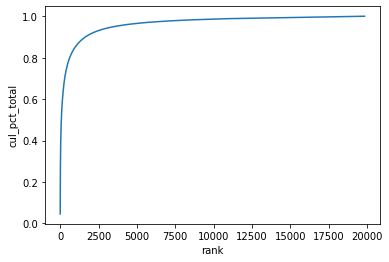

In [26]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [27]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.31796119361990155

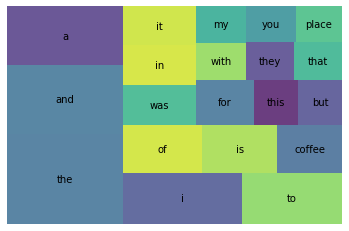

In [28]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [30]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(X['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

X['tokens'] = tokens

In [31]:
X['tokens'].head()

0    [    , love, love, loved, the, atmosphere!, ev...
1    [  , listed, in, date, night:, austin,, ambian...
2    [    , listed, in, brunch, spots, i, loved, th...
3    [  , very, cool, decor!, good, drinks, nice, s...
4    [    , they, are, located, within, the, northc...
Name: tokens, dtype: object

In [32]:
wc = count(X['tokens'])

In [33]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,the,6847,34649,1.0,0.043497,0.043497,0.899028
29,and,6853,26442,2.0,0.033194,0.076692,0.899816
44,a,6240,22657,3.0,0.028443,0.105135,0.819328
46,i,5511,19991,4.0,0.025096,0.130231,0.723608
27,,4782,17381,5.0,0.021820,0.152050,0.627889


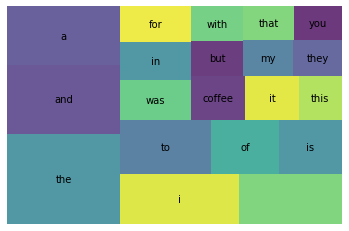

In [34]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(X['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

X['tokens'] = tokens

In [36]:
X.tokens.head()

0    [    , love, love, loved, atmosphere!, corner,...
1    [  , listed, date, night:, austin,, ambiance, ...
2    [    , listed, brunch, spots, loved, eclectic,...
3    [  , cool, decor!, good, drinks, nice, seating...
4    [    , located, northcross, mall, shopping, ce...
Name: tokens, dtype: object

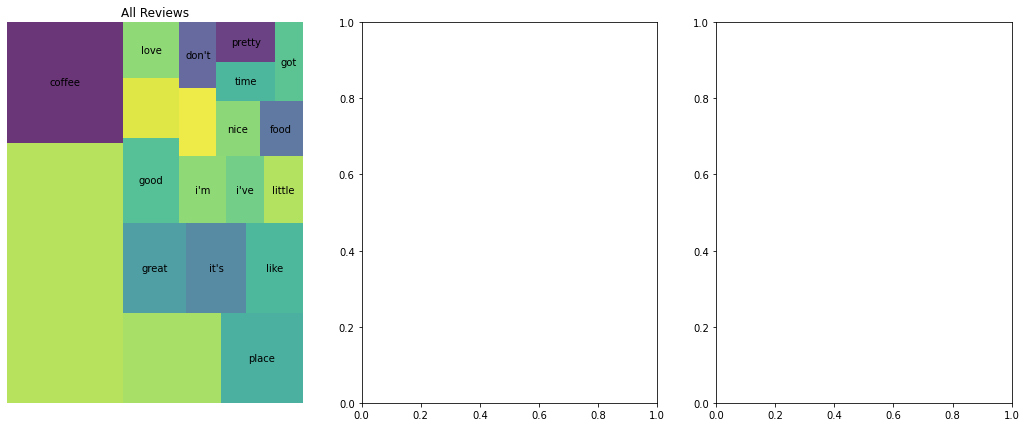

In [37]:
wc = count(X['tokens'])
#wc_fire_hd_8 = count(df[df['FireHD_8'] == True]['tokens'])
#wc_kindle = count(df[df['Kindle'] == True]['tokens'])

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
#wc_fire_top20 = wc_fire_hd_8[wc_fire_hd_8['rank'] <= 20]
#wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

#axes[1].set_title('Fire HD 8 Tablet')
#squarify.plot(sizes=wc_fire_top20['pct_total'], label=wc_fire_top20['word'], alpha=.8, ax=axes[1])
#axes[1].axis('off')

#axes[2].set_title('Kindle')
#squarify.plot(sizes=wc_kindle_top20['pct_total'], label=wc_kindle_top20['word'], alpha=.8, ax=axes[2])
#axes[2].axis('off')
plt.show()

In [38]:
STOP_WORDS = nlp.Defaults.stop_words.union(['austin','I', "don't", 'i', 's', 'got', 'it',"i've", "i'm", '   ', '    ', '-', "it's", 'it.', 'the', 'this','definitely','',' ','  '])

In [39]:
tokens = []

for doc in tokenizer.pipe(X['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
X['tokens'] = tokens

In [40]:
wc = count(X['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,coffee,4213,8063,1.0,0.021683,0.021683,0.553178
74,place,3029,4264,2.0,0.011467,0.033149,0.397715
98,great,2438,3250,3.0,0.008740,0.041889,0.320116
173,like,2034,2902,4.0,0.007804,0.049693,0.267069
166,good,2084,2779,5.0,0.007473,0.057166,0.273634
36,love,1434,1806,6.0,0.004857,0.062023,0.188288
771,little,1230,1479,7.0,0.003977,0.066000,0.161502
184,nice,1188,1368,8.0,0.003679,0.069679,0.155987
369,food,1096,1367,9.0,0.003676,0.073355,0.143908
606,time,1099,1345,10.0,0.003617,0.076972,0.144301


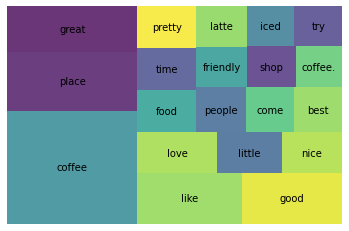

In [41]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [42]:
X['star_rating'].value_counts()

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

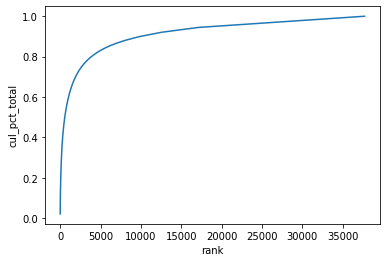

In [43]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [44]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37700,"monsieur,",1,1,37703.0,0.000003,0.999949,0.000131
37702,delicious...and,1,1,37704.0,0.000003,0.999952,0.000131
37704,"(turkey,",1,1,37705.0,0.000003,0.999954,0.000131
37708,romaine,1,1,37706.0,0.000003,0.999957,0.000131
37703,"rib,",1,1,37707.0,0.000003,0.999960,0.000131
37706,"predictably,",1,1,37708.0,0.000003,0.999962,0.000131
37705,blts,1,1,37709.0,0.000003,0.999965,0.000131
37707,turkey),1,1,37710.0,0.000003,0.999968,0.000131
37709,(pork),1,1,37711.0,0.000003,0.999970,0.000131
37712,roomier,1,1,37712.0,0.000003,0.999973,0.000131


In [45]:
wc['appears_in_pct'].describe()

count    37722.000000
mean         0.001171
std          0.006891
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.553178
Name: appears_in_pct, dtype: float64

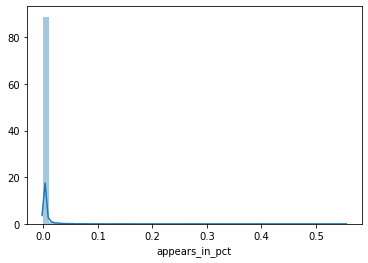

In [46]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

(37722, 7)
(744, 7)


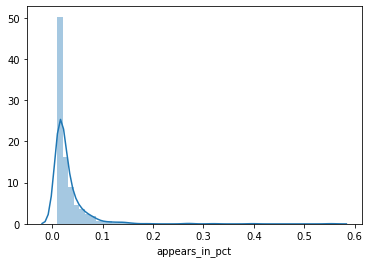

In [47]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

print(wc.shape)
wc = wc[wc['appears_in_pct'] >= 0.01]
print(wc.shape)

sns.distplot(wc['appears_in_pct']);

In [48]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

/home/iesous-kurios/.local/share/virtualenvs/lambda-NHOSnBo2/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [49]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


In [50]:
# Put in a new column `stems`
X['stems'] = X.tokens.progress_apply(lambda x: [ps.stem(word) for word in x])
X.head(1)

100%|██████████| 7616/7616 [00:05<00:00, 1270.63it/s]


,coffee_shop_name,full_review_text,star_rating,date,tokens,stems
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corn...,5.0,11/25/2016,"[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere!, corner, coffe,..."


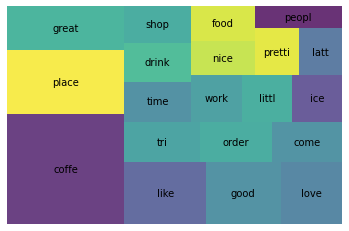

In [51]:
wc = count(X['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [52]:
sent = "This is the start of our NLP adventure. We started here with Spacy."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventure    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .


In [53]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [54]:
X['lemmas'] = X['full_review_text'].progress_apply(get_lemmas)

100%|██████████| 7616/7616 [02:11<00:00, 58.03it/s]


In [55]:
X['lemmas'].head()

0    [    , love, love, love, atmosphere, corner, c...
1    [  , list, date, night, austin, ambiance, aust...
2    [    , list, brunch, spot, love, eclectic, hom...
3    [  , cool, decor, good, drink, nice, seating, ...
4    [    , locate, northcross, mall, shopping, cen...
Name: lemmas, dtype: object

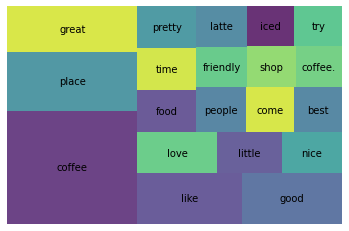

In [56]:
wc = count(X['tokens'])

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')


plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

